# Exploratory Data Analysis - Retail

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('SampleSuperstore.csv')
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [3]:
data.shape
#9993 rows and 13 columns

(9994, 13)

In [4]:
data.info()
#does not contain any missing values  
#two numerical columns : Postal code, quantity

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [5]:
data = data.drop(['Postal Code','Country'], axis =1)

In [6]:
data.nunique()
#There are three types in segment
#Since country is one, we can remove that column as well
#There are 4 regions
#3 categories and 17 sub-categories

Ship Mode          4
Segment            3
City             531
State             49
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [7]:
data.describe(include ='all')

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
count,9994,9994,9994,9994,9994,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000
unique,4,3,531,49,4,3,17,NaN,NaN,NaN,NaN
top,Standard Class,Consumer,New York City,California,West,Office Supplies,Binders,NaN,NaN,NaN,NaN
freq,5968,5191,915,2001,3203,6026,1523,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,229.858001,3.789574,0.156203,28.656896
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,623.245101,2.225110,0.206452,234.260108
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.444000,1.000000,0.000000,-6599.978000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.280000,2.000000,0.000000,1.728750
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.490000,3.000000,0.200000,8.666500
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,209.940000,5.000000,0.200000,29.364000


In [8]:
#The maximum sale made is 22638.480000 and the minimum is 0.44000
#The max quantity sold is 14 and min is 1, the average is around 4
#A negative profit margin is when production costs are more that revenue, since it is minimum thats good
#Average profit made is 29

In [9]:
cat_col = data.select_dtypes(include = ['object']).columns
num_col = data.select_dtypes(include = ['int64','float64']).columns
print('Categorical variables : ',cat_col)
print('Numerical variables : ',num_col)

Categorical variables :  Index(['Ship Mode', 'Segment', 'City', 'State', 'Region', 'Category',
       'Sub-Category'],
      dtype='object')
Numerical variables :  Index(['Sales', 'Quantity', 'Discount', 'Profit'], dtype='object')


# EXPLORATORY DATA ANALYSIS************

In [10]:
data['Sales'].max()

22638.48

Sales
<built-in method count of str object at 0x0000023F34CB74F0>
Skew : 12.97


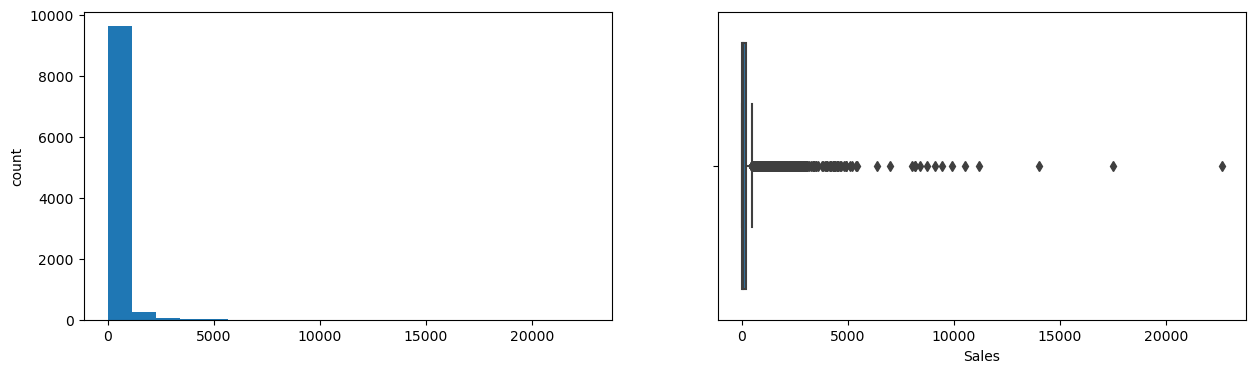

Quantity
<built-in method count of str object at 0x0000023F34CB7630>
Skew : 1.28


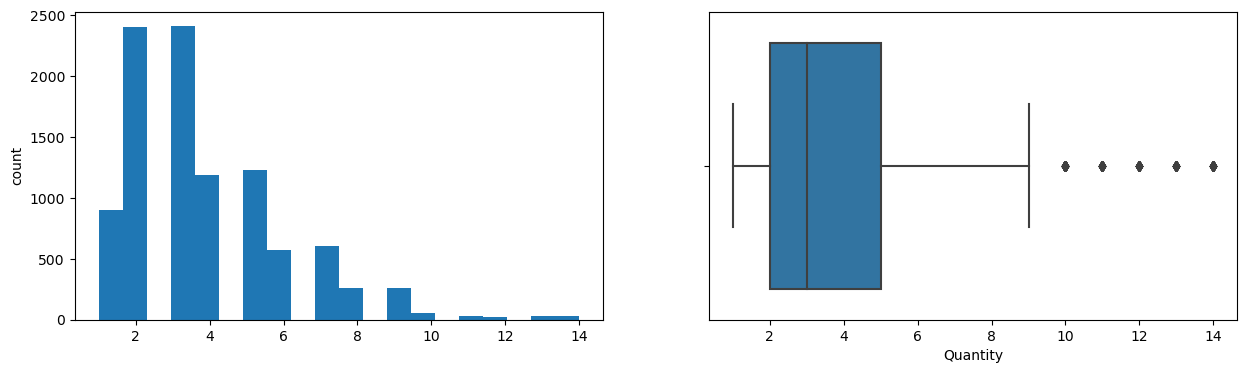

Discount
<built-in method count of str object at 0x0000023F34CB7670>
Skew : 1.68


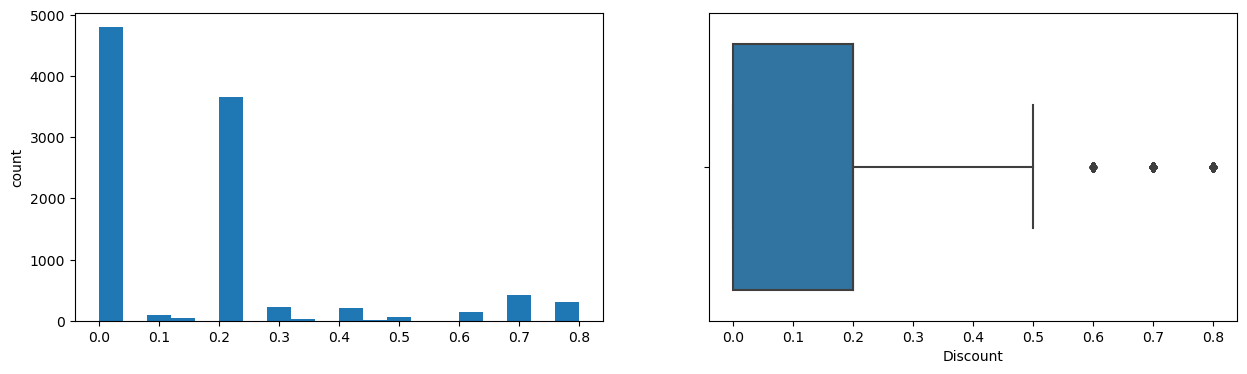

Profit
<built-in method count of str object at 0x0000023F34CB76B0>
Skew : 7.56


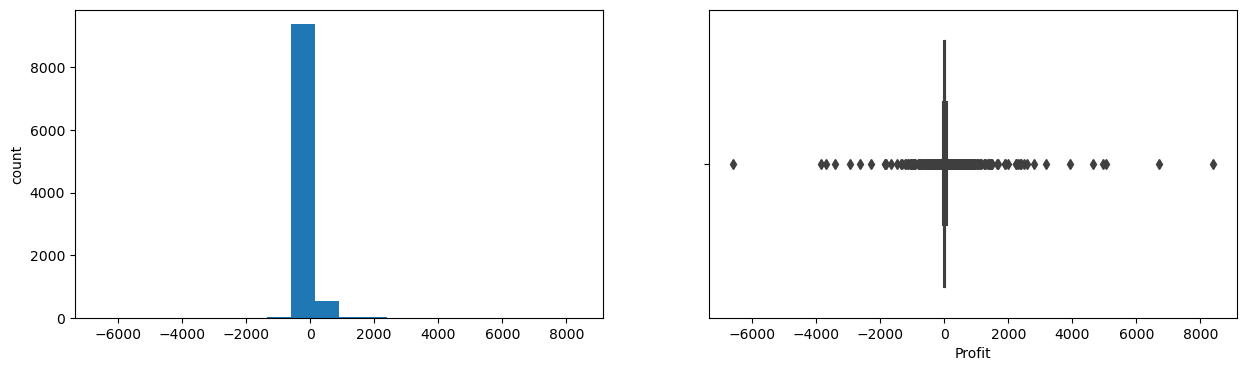

In [11]:
for col in num_col:
    print(col)
    count = col.count
    print(count)
    print('Skew :', round(data[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    data[col].hist(grid=False, bins = 20)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[col])
    plt.show()

Observations : 
The sales box plot shows many data points after the whisker,which must be trend-related factors such as holiday shopping or special promotions. 

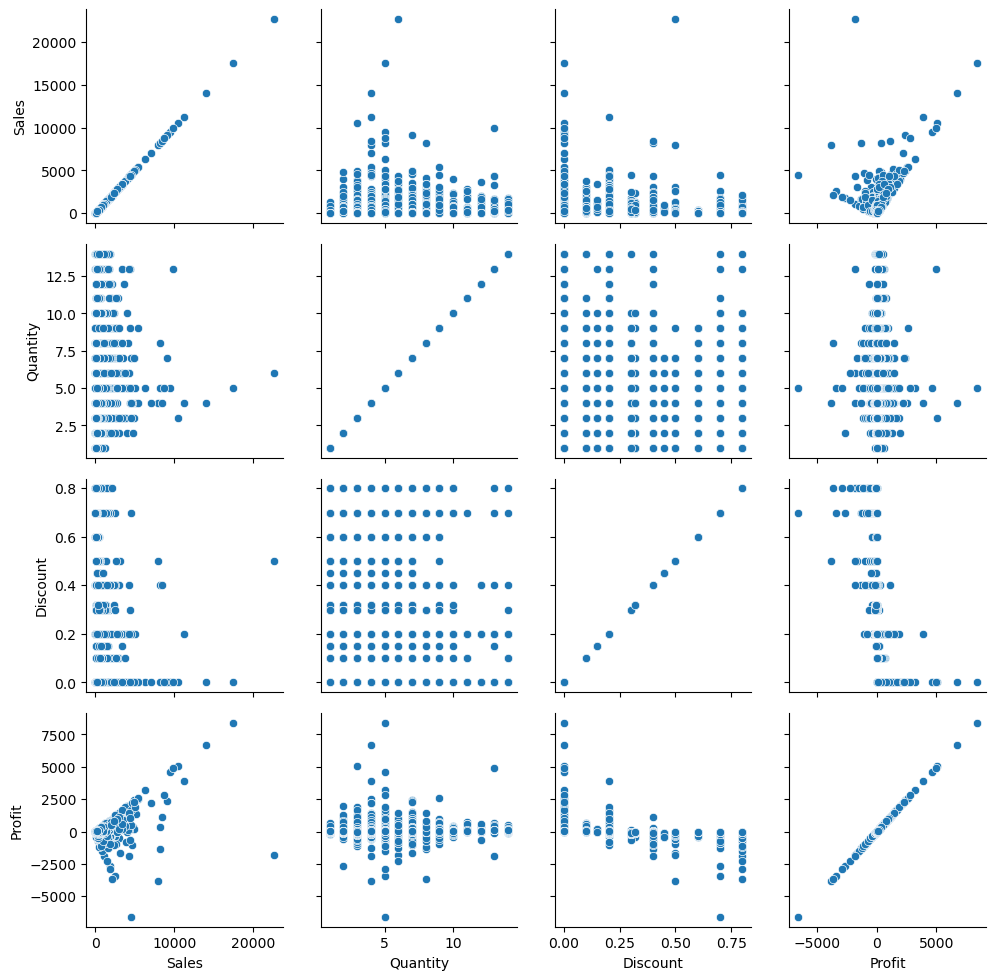

In [12]:
num = ['Sales','Quantity','Discount','Profit']
num_data = data[num]
g = sns.PairGrid(num_data)
g.map(sns.scatterplot)

Observations:
1. Profit and Sales - The profit is clustered around the 0 and no visible increase in profits as sale increases. It shows that the sales does not affect the profit.
2. Similarly, quantity is also not correlated to profit. As discount increases, we can see that profit decreases.

# BAR CHARTS FOR ANALYSING SHIP MODE AND SEGMENT ****

In [13]:
data.columns

Index(['Ship Mode', 'Segment', 'City', 'State', 'Region', 'Category',
       'Sub-Category', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [14]:
shipmode_profit = data.groupby('Ship Mode')['Profit'].mean().reset_index()

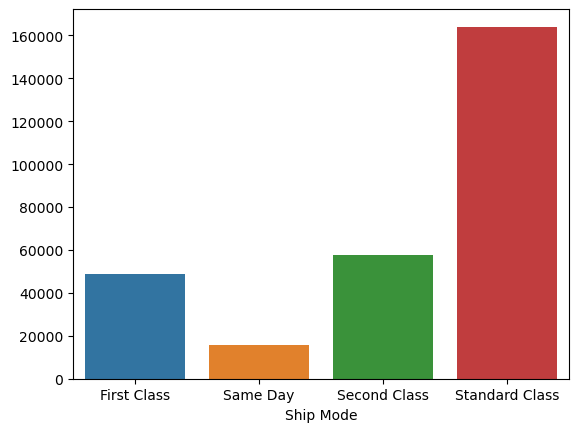

In [28]:
shipmode = data.groupby(["Ship Mode"])["Profit"].sum()
sns.barplot(x = shipmode.index, y = shipmode.values )

plt.show()

Segment
Consumer       134119.2092
Corporate       91979.1340
Home Office     60298.6785
Name: Profit, dtype: float64


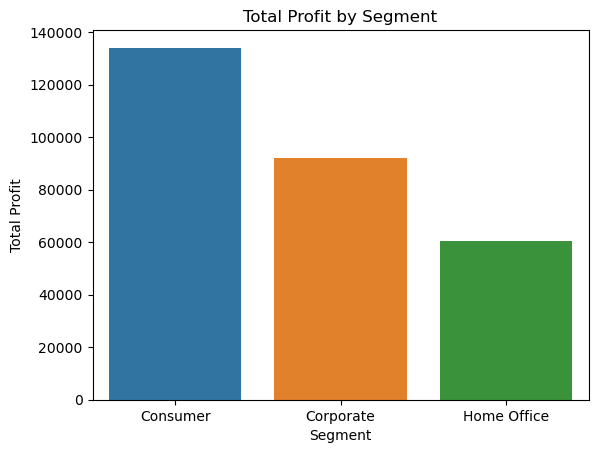

In [4]:
segment=data.groupby(["Segment"])["Profit"].sum()
print(segment)
sns.barplot(x=segment.index, y=segment.values)
plt.xticks(rotation=0)  
plt.xlabel("Segment")
plt.ylabel("Total Profit")
plt.title("Total Profit by Segment")
plt.show()

In [5]:
sales_and_Category = data[['Sales','Category']].groupby(['Sales','Category']).size().reset_index().max()
print('Maximum sales made : ', sales_and_Category[:1], 'in the category :' , sales_and_Category [1:2] )

Maximum sales made :  Sales    22638.48
dtype: object in the category : Category    Technology
dtype: object


# **PIE DATA FOR ANALYSING SUBCATEGORY SALES **

In [6]:
grouped_data = data[['Sales','Sub-Category']].groupby(['Sub-Category']).size()
grouped_profits = data[['Profit','Sub-Category']].groupby(['Sub-Category']).size()

Text(0.5, 1.0, 'Sub-category wise Sales')

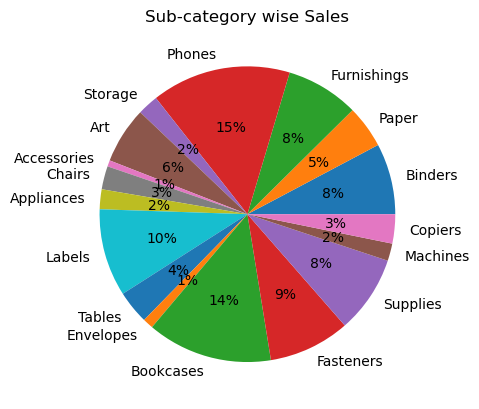

In [7]:
Category_count = data['Category'].value_counts()
category_index = data['Category'].value_counts().index
Subcategory_count = data['Sub-Category'].value_counts()
Subcategory_index = data['Sub-Category'].value_counts().index
plt.pie(grouped_data , labels = Subcategory_index, autopct = '%1.0f%%' )
plt.title('Sub-category wise Sales')

Text(0.5, 1.0, 'Sub-category wise profits')

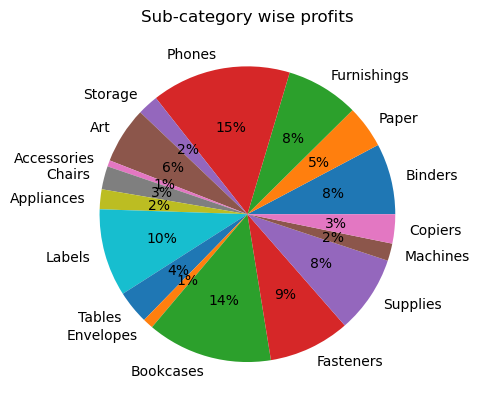

In [8]:
plt.pie(grouped_profits , labels = Subcategory_index, autopct = '%1.0f%%' )
plt.title('Sub-category wise profits')

The top 5 items beign sold are Phones, Furnishings, Binders, Paper and Storage.
Lets see the profit.

In [9]:
Profit_and_Category = data[['Profit','Category']].groupby(['Profit','Category']).size().reset_index().max()
print('Maximum profit made : ', Profit_and_Category[:1], 'in the category :' , Profit_and_Category [1:2] )

Maximum profit made :  Profit    8399.976
dtype: object in the category : Category    Technology
dtype: object


# Observations
1. Since phones are the most profitable and sold items, an opportunity for cross-selling related accessories, such as phone cases, screen protectors, or chargers, to boost sales and profits further.
2. Since consumers are the profitable and high selling segment, more marketing and product strategies should be focused on the consumers needs and preferences.
3. Clearence sales can be held to encourage the sales of least profitable items like envelopes, storage and accessories.
4. Standard is the most profitable shipping mode, this might be the reason due to it being cost-effective.****
